In [1]:
# Note to make the corrected rate vs temperature plot
# The datasets: measured time, temperature, corrected rate, error on rate, 
# A0 (starting activity) found from exponential fit and the found error on A0.

# NB! 
# The txt files used here are all obtained/calculated in pyhton-notebook: 
# Temp2232_measurement_allData_expFit.ipynb & T3222_allData_expFit_with_t_Start_not_at_0_to_combine_with_T2232dataset
# So, Temp2232_measurement_allData_expFit.ipynb & T3222_allData_expFit_with_t_Start_not_at_0_to_combine_with_T2232dataset have to be run first!
 

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import matplotlib
import numpy as np
import scipy as scipy
import scipy.optimize as optimize

matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [2]:
# Define functions we will need later

# RMS (root mean square)
# def rms(num):
#     return np.sqrt(sum(n*n for n in num)/len(num))

# # NEW for errors:
def err(arr):
    return np.sqrt(sum(n*n for n in arr))/len(arr)

# RMSE (root-mean-square deviation (RMSD) or root-mean-square error (RMSE))
# def rmse(predictions, targets):
#     return np.sqrt((np.mean((predictions - targets) ** 2)))

# sample variance (= average value of deviations) G.F. Knoll p.69
def dev(exp_mean, meas_points):
    return np.sqrt((sum((exp_mean - meas_points) ** 2))/(len(meas_points)-1))

# Define a linear function to fit the rate vs temperature data with.
def lin_func(x, a, b):
    return b + a*x

# Chi2 fit tester:
def chi2(measured, errors_measured, fit):
    return sum(((measured-fit)**2)/(errors_measured**2))

# Beautifull recursive defaultdict so that automatically all calls that do not excist return a new empty dict
from collections import defaultdict
def recursive_defaultdict():
    return defaultdict(recursive_defaultdict)

In [3]:
# Load txt files with data-arrays of time and temperature

# Temperature going up from 22 to 32 degrees
ti44pk0_time_T22_32 = np.loadtxt("ti44pk0_time_T22_32")
ti44pk0_temp_T22_32 = np.loadtxt("ti44pk0_temp_T22_32")
# Temperature going down from 32 to 22 degrees
ti44pk0_time_T3222 = np.loadtxt("ti44pk0_time_T3222_toCombine")
ti44pk0_temp_T3222 = np.loadtxt("ti44pk0_temp_T3222_toCombine")

# Download arrays with:  
# the measured rate,  
# corrected rate (corrected_rate = measured_rate - exponential_fit + A0, thus corrected for exponential decay),
# the error on the rate
# and an array with the starting value rate (A0) found by the exponential fit and the error on A0

# Temperature going up from 22 to 32 degrees
ti44pk0_rate_T2232 = np.loadtxt("ti44pk0_rate_T22_32")
ti44pk0_corr_rate_T2232 = np.loadtxt('ti44pk0_corrected_rate_T22_32')
ti44pk0_error_rate_T2232 =  np.loadtxt('ti44pk0_error_rate_T22_32')
foundA0_and_error2232 = np.loadtxt('ti44pk0_foundFitA0_and_Error22_32')

# Temperature going down from 32 to 22 degrees
ti44pk0_rate_T3222 = np.loadtxt("ti44pk0_rate_T3222_toCombine")
ti44pk0_corr_rate_T3222 = np.loadtxt('ti44pk0_corrected_rate_3222_toCombine')
ti44pk0_error_rate_T3222 =  np.loadtxt('ti44pk0_error_rate_T3222_toCombine')
foundA0_and_error_andStartingTime3222 = np.loadtxt('ti44pk0_foundFitA0_and_Error_andStartingTime_3222_toCombine')

# The 2nd dataset (= going down from 32 to 22 degrees) has a starting time that is not 0
# because it is about 3 months and the length of dataset 1 later than the first dataset
# this has to be taken into account, thus the 2nd dataset starts at t = length_1st_dataset+time_between_datasets
startingTimeT3222 = foundA0_and_error_andStartingTime3222[2]

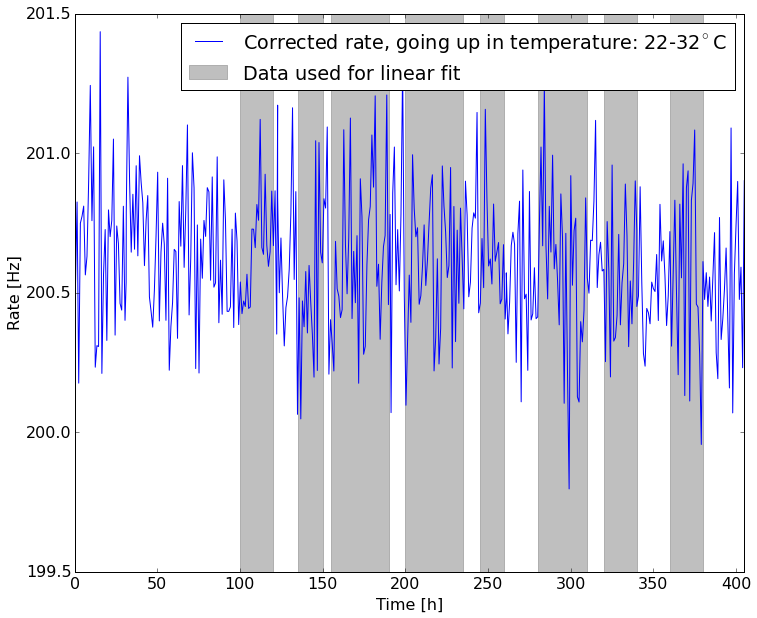

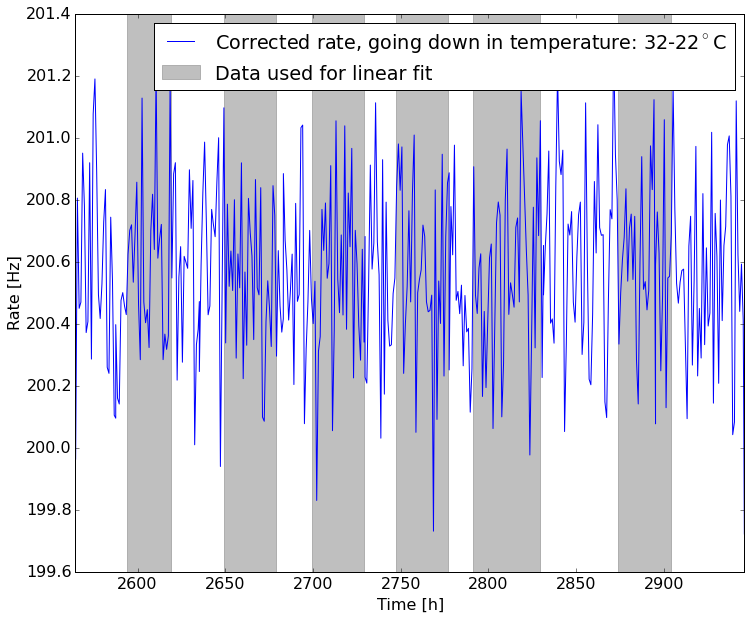

C:\Users\Dorine\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:2651: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


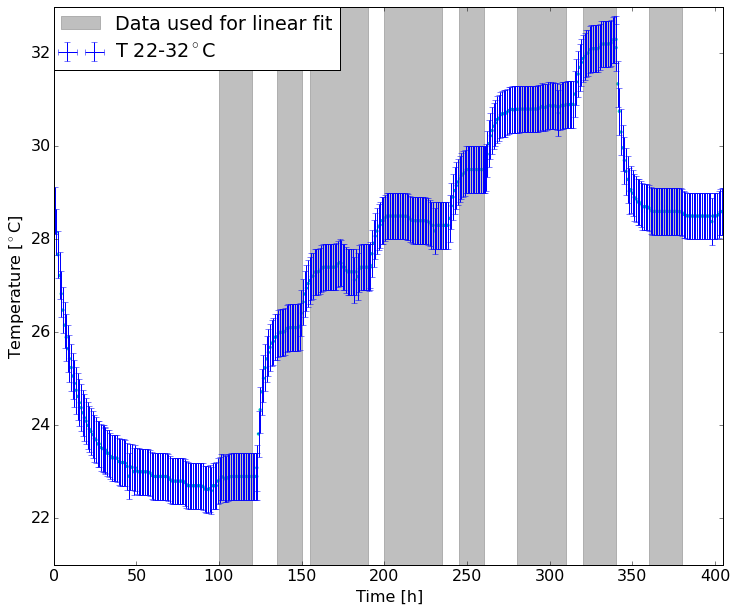

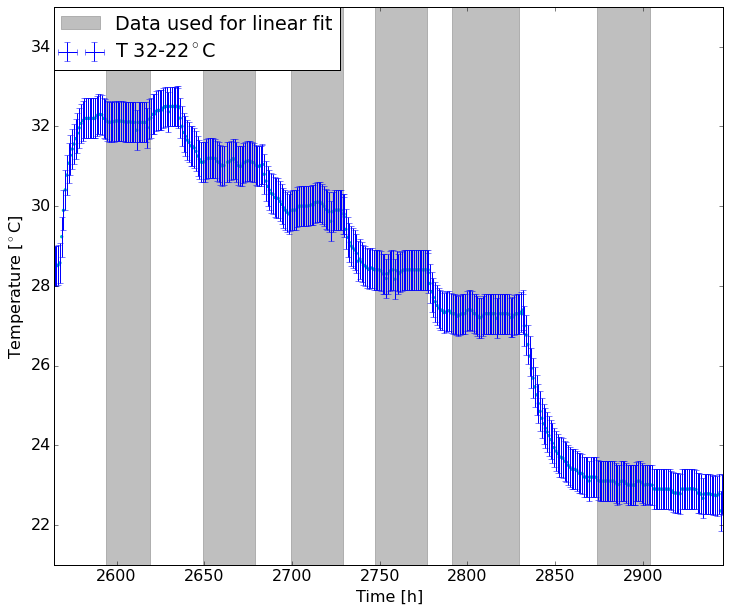

In [4]:
# Plot the two datasets used for the corrected rate vs temperature plot. 
# Show in shaded (grey) the parts of the dataset that are used for the corrected rate vs temperature plot.
# Only the shaded parts are used because the temperature was ~constant during those intervals. Giving higher statistics.

# Plot corrected rate vs time (measured rate can be added)

# Temperature going up from 22 to 32 degrees
plt.xlabel('Time [h]')
plt.ylabel('Rate [Hz]')
plt.plot(ti44pk0_time_T22_32, ti44pk0_corr_rate_T2232, label = 'Corrected rate, going up in temperature: 22-32$^{\circ}$C')
# plt.plot(ti44pk0_time_T22_32, ti44pk0_rate_T2232, label = 'Measured rate')
plt.axvspan(100, 120, alpha=0.5, color='grey', label = 'Data used for linear fit')
plt.axvspan(135, 150, alpha=0.5, color='grey')
plt.axvspan(155, 190, alpha=0.5, color='grey')
plt.axvspan(200, 235, alpha=0.5, color='grey')
plt.axvspan(245, 260, alpha=0.5, color='grey')
plt.axvspan(280, 310, alpha=0.5, color='grey')
plt.axvspan(320, 340, alpha=0.5, color='grey')
plt.axvspan(360, 380, alpha=0.5, color='grey')
plt.xlim(0,405)   
plt.legend()
plt.savefig('timeVScorrRate_Ti_511keV_T22_32.png', format='png', dpi=300)
plt.savefig('timeVScorrRate_Ti_511keV_T22_32.pdf', format='pdf', dpi=300)
plt.show()

# Temperature going down from 32 to 22 degrees
plt.xlabel('Time [h]')
plt.ylabel('Rate [Hz]')
plt.plot(ti44pk0_time_T3222, ti44pk0_corr_rate_T3222, label = 'Corrected rate, going down in temperature: 32-22$^{\circ}$C')
# plt.plot(ti44pk0_time_T3222, ti44pk0_rate_T3222, label = 'Measured rate')
plt.axvspan(30+startingTimeT3222, 55+startingTimeT3222, alpha=0.5, color='grey', label = 'Data used for linear fit')
plt.axvspan(85+startingTimeT3222, 115+startingTimeT3222, alpha=0.5, color='grey')
plt.axvspan(135+startingTimeT3222, 165+startingTimeT3222, alpha=0.5, color='grey')
plt.axvspan(183+startingTimeT3222, 213+startingTimeT3222, alpha=0.5, color='grey')
plt.axvspan(227+startingTimeT3222, 265+startingTimeT3222, alpha=0.5, color='grey')
plt.axvspan(310+startingTimeT3222, 340+startingTimeT3222, alpha=0.5, color='grey')
plt.xlim(startingTimeT3222,max(ti44pk0_time_T3222))   
plt.legend()
plt.savefig('timeVScorrRate_Ti_511keV_T3222toCombine.png', format='png', dpi=300)
plt.savefig('timeVScorrRate_Ti_511keV_T3222toCombine.pdf', format='pdf', dpi=300)
plt.show()

# Plot temperature vs time

# Temperature going up from 22 to 32 degrees
plt.xlabel('Time [h]')
plt.ylabel('Temperature [$^{\circ}$C]')
plt.errorbar(ti44pk0_time_T22_32, ti44pk0_temp_T22_32, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 22-32$^{\circ}$C')
plt.scatter(ti44pk0_time_T22_32, ti44pk0_temp_T22_32, color='c', marker='.', edgecolors='none', s=45)
plt.axvspan(100, 120, alpha=0.5, color='grey', label = 'Data used for linear fit')
plt.axvspan(135, 150, alpha=0.5, color='grey')
plt.axvspan(155, 190, alpha=0.5, color='grey')
plt.axvspan(200, 235, alpha=0.5, color='grey')
plt.axvspan(245, 260, alpha=0.5, color='grey')
plt.axvspan(280, 310, alpha=0.5, color='grey')
plt.axvspan(320, 340, alpha=0.5, color='grey')
plt.axvspan(360, 380, alpha=0.5, color='grey')
plt.xlim(0,405) 
plt.ylim(21,33)
plt.legend(loc=2, borderaxespad=0.)
# plt.savefig('timeVStemp_Ti_511keV_T22_32_shaded.png', format='png', dpi=300)
# plt.savefig('timeVStemp_Ti_511keV_T22_32_shaded.pdf', format='pdf', dpi=300)
plt.show()

# Temperature going down from 32 to 22 degrees
plt.xlabel('Time [h]')
plt.ylabel('Temperature [$^{\circ}$C]')
plt.errorbar(ti44pk0_time_T3222, ti44pk0_temp_T3222, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 32-22$^{\circ}$C')
plt.scatter(ti44pk0_time_T3222, ti44pk0_temp_T3222, color='c', marker='.', edgecolors='none', s=45)
plt.axvspan(30+startingTimeT3222, 55+startingTimeT3222, alpha=0.5, color='grey', label = 'Data used for linear fit')
plt.axvspan(85+startingTimeT3222, 115+startingTimeT3222, alpha=0.5, color='grey')
plt.axvspan(135+startingTimeT3222, 165+startingTimeT3222, alpha=0.5, color='grey')
plt.axvspan(183+startingTimeT3222, 213+startingTimeT3222, alpha=0.5, color='grey')
plt.axvspan(227+startingTimeT3222, 265+startingTimeT3222, alpha=0.5, color='grey')
plt.axvspan(310+startingTimeT3222, 340+startingTimeT3222, alpha=0.5, color='grey')
plt.xlim(startingTimeT3222,max(ti44pk0_time_T3222)) 
plt.ylim(21,35)
plt.legend(loc=2, borderaxespad=0.)
plt.savefig('timeVStemp_Ti_511keV_T22_32toCombine_shaded.png', format='png', dpi=300)
# plt.savefig('timeVStemp_Ti_511keV_T22_32_shaded.pdf', format='pdf', dpi=300)
plt.show()

In [5]:
# Get only the parts of the datasets with ~constant temperature. 
# The areas are chosen by eye. 

# Temperature going up from 22 to 32 degrees
step_rateUP = {}
step_corr_rateUP = {}
step_err_rateUP = {}
step_tempUP = {}
for i in range(8):
    step_rateUP[i] = {}
    step_corr_rateUP[i] = {}
    step_err_rateUP[i] = {}
    step_tempUP[i] = {}

step_corr_rateUP[0] = ti44pk0_corr_rate_T2232[100:120]
step_corr_rateUP[1] = ti44pk0_corr_rate_T2232[135:150]
step_corr_rateUP[2] = ti44pk0_corr_rate_T2232[155:190]
step_corr_rateUP[3] = ti44pk0_corr_rate_T2232[200:235]
step_corr_rateUP[4] = ti44pk0_corr_rate_T2232[245:260]
step_corr_rateUP[5] = ti44pk0_corr_rate_T2232[280:310]
step_corr_rateUP[6] = ti44pk0_corr_rate_T2232[320:340]
step_corr_rateUP[7] = ti44pk0_corr_rate_T2232[360:380]

step_err_rateUP[0] = ti44pk0_error_rate_T2232[100:120]
step_err_rateUP[1] = ti44pk0_error_rate_T2232[135:150]
step_err_rateUP[2] = ti44pk0_error_rate_T2232[155:190]
step_err_rateUP[3] = ti44pk0_error_rate_T2232[200:235]
step_err_rateUP[4] = ti44pk0_error_rate_T2232[245:260]
step_err_rateUP[5] = ti44pk0_error_rate_T2232[280:310]
step_err_rateUP[6] = ti44pk0_error_rate_T2232[320:340]
step_err_rateUP[7] = ti44pk0_error_rate_T2232[360:380]

step_tempUP[0] = ti44pk0_temp_T22_32[100:120]
step_tempUP[1] = ti44pk0_temp_T22_32[135:150]
step_tempUP[2] = ti44pk0_temp_T22_32[155:190]
step_tempUP[3] = ti44pk0_temp_T22_32[200:235]
step_tempUP[4] = ti44pk0_temp_T22_32[245:260]
step_tempUP[5] = ti44pk0_temp_T22_32[280:310]
step_tempUP[6] = ti44pk0_temp_T22_32[320:340]
step_tempUP[7] = ti44pk0_temp_T22_32[360:380]

    # Measured rate = uncorrected rate (not needed)
step_rateUP[0] = ti44pk0_rate_T2232[100:120]
step_rateUP[1] = ti44pk0_rate_T2232[135:150]
step_rateUP[2] = ti44pk0_rate_T2232[155:190]
step_rateUP[3] = ti44pk0_rate_T2232[200:235]
step_rateUP[4] = ti44pk0_rate_T2232[245:260]
step_rateUP[5] = ti44pk0_rate_T2232[280:310]
step_rateUP[6] = ti44pk0_rate_T2232[320:340]
step_rateUP[7] = ti44pk0_rate_T2232[360:380]

# Temperature going down from 32 to 22 degrees
step_rateDOWN = {}
step_corr_rateDOWN = {}
step_err_rateDOWN = {}
step_tempDOWN = {}
for i in range(6):
    step_rateDOWN[i] = {}
    step_corr_rateDOWN[i] = {}
    step_err_rateDOWN[i] = {}
    step_tempDOWN[i] = {}
    
step_corr_rateDOWN[0] = ti44pk0_corr_rate_T3222[30:55]
step_corr_rateDOWN[1] = ti44pk0_corr_rate_T3222[85:115]
step_corr_rateDOWN[2] = ti44pk0_corr_rate_T3222[135:165]
step_corr_rateDOWN[3] = ti44pk0_corr_rate_T3222[183:213]
step_corr_rateDOWN[4] = ti44pk0_corr_rate_T3222[227:265]
step_corr_rateDOWN[5] = ti44pk0_corr_rate_T3222[310:340]

step_err_rateDOWN[0] = ti44pk0_error_rate_T3222[30:55]
step_err_rateDOWN[1] = ti44pk0_error_rate_T3222[85:115]
step_err_rateDOWN[2] = ti44pk0_error_rate_T3222[135:165]
step_err_rateDOWN[3] = ti44pk0_error_rate_T3222[183:213]
step_err_rateDOWN[4] = ti44pk0_error_rate_T3222[227:265]
step_err_rateDOWN[5] = ti44pk0_error_rate_T3222[310:340]

step_tempDOWN[0] = ti44pk0_temp_T3222[30:55]
step_tempDOWN[1] = ti44pk0_temp_T3222[85:115]
step_tempDOWN[2] = ti44pk0_temp_T3222[135:165]
step_tempDOWN[3] = ti44pk0_temp_T3222[183:213]
step_tempDOWN[4] = ti44pk0_temp_T3222[227:265]
step_tempDOWN[5] = ti44pk0_temp_T3222[310:340]

    # Measured rate = uncorrected rate 
step_rateDOWN[0] = ti44pk0_rate_T3222[30:55]
step_rateDOWN[1] = ti44pk0_rate_T3222[85:115]
step_rateDOWN[2] = ti44pk0_rate_T3222[135:165]
step_rateDOWN[3] = ti44pk0_rate_T3222[183:213]
step_rateDOWN[4] = ti44pk0_rate_T3222[227:265]
step_rateDOWN[5] = ti44pk0_rate_T3222[310:340]

# HACK! There is 1 datapoint with a temperature of 116 degrees Celcius, which is not possible 
# (heater shuts down when it gets above 40 degrees and the next point is 31 degrees again, so it's weird)
# I don't know why this happens and I replaced the temp-value of this point with the one from 
# the data point before that one (so [14] and [15] are the same) so there is no hole in the data
step_tempDOWN[1][15] = step_tempDOWN[1][14]

In [6]:
# Make an array with the mean for the corrected rate & temperatures
# Determine the RMS errors for temperature 
# Determine error of corrected rate based on the errors of the measured rate
# the error for the measured rate is the same as the error for the corrected rate

# Temperature going up from 22 to 32 degrees
mean_temp_stepsUP = recursive_defaultdict()
mean_corr_rate_stepsUP = recursive_defaultdict()
error_rate_stepsUP = recursive_defaultdict()
mean_temp_steps_arrayUP = []
mean_corr_rate_steps_arrayUP = []
error_rate_steps_arrayUP = []

rmse_temp_stepsUP = recursive_defaultdict()
rmse_temp_steps_arrayUP = []

# For measured rate 
mean_rate_steps_arrayUP = []
mean_rate_stepsUP = recursive_defaultdict()

for i in range(8):
    mean_corr_rate_stepsUP[i] = np.mean(step_corr_rateUP[i])
    mean_corr_rate_steps_arrayUP.append(mean_corr_rate_stepsUP[i])
        
    error_rate_stepsUP[i] = err(step_err_rateUP[i])
    error_rate_steps_arrayUP.append(error_rate_stepsUP[i])
    
#     error_rate_stepsUP[i] = rms(step_err_rateUP[i])
#     error_rate_steps_arrayUP.append(error_rate_stepsUP[i])
            
    mean_temp_stepsUP[i] = np.mean(step_tempUP[i])
    mean_temp_steps_arrayUP.append(mean_temp_stepsUP[i])
    rmse_temp_stepsUP[i] = dev(mean_temp_stepsUP[i],step_tempUP[i])
    rmse_temp_steps_arrayUP.append(rmse_temp_stepsUP[i])
    
    # For measured rate    
    mean_rate_stepsUP[i] = np.mean(step_rateUP[i])
    mean_rate_steps_arrayUP.append(mean_rate_stepsUP[i])

# Make np.arrays insteas of lists
mean_temp_steps_arrayUP = np.array(mean_temp_steps_arrayUP)
mean_corr_rate_steps_arrayUP = np.array(mean_corr_rate_steps_arrayUP)
error_rate_steps_arrayUP = np.array(error_rate_steps_arrayUP)
rmse_temp_steps_arrayUP = np.array(rmse_temp_steps_arrayUP)
mean_rate_steps_arrayUP = np.array(mean_rate_steps_arrayUP)    
    
# Temperature going down from 32 to 22 degrees
mean_temp_stepsDOWN = recursive_defaultdict()
mean_corr_rate_stepsDOWN = recursive_defaultdict()
error_rate_stepsDOWN = recursive_defaultdict()
mean_temp_steps_arrayDOWN = []
mean_corr_rate_steps_arrayDOWN = []
error_rate_steps_arrayDOWN = []

rmse_temp_stepsDOWN = recursive_defaultdict()
rmse_temp_steps_arrayDOWN = []

# For measured rate 
mean_rate_steps_arrayDOWN = []
mean_rate_stepsDOWN = recursive_defaultdict()

for i in range(6):
    mean_corr_rate_stepsDOWN[i] = np.mean(step_corr_rateDOWN[i])
    mean_corr_rate_steps_arrayDOWN.append(mean_corr_rate_stepsDOWN[i])
    
    error_rate_stepsDOWN[i] = err(step_err_rateDOWN[i])
    error_rate_steps_arrayDOWN.append(error_rate_stepsDOWN[i])
    
#     error_rate_stepsDOWN[i] = rms(step_corr_rateDOWN[i])
#     error_rate_steps_arrayDOWN.append(error_rate_stepsDOWN[i])
            
    mean_temp_stepsDOWN[i] = np.mean(step_tempDOWN[i])
    mean_temp_steps_arrayDOWN.append(mean_temp_stepsDOWN[i])
    rmse_temp_stepsDOWN[i] = dev(mean_temp_stepsDOWN[i], step_tempDOWN[i])
    rmse_temp_steps_arrayDOWN.append(rmse_temp_stepsDOWN[i])
    
    # For measured rate    
    mean_rate_stepsDOWN[i] = np.mean(step_rateDOWN[i])
    mean_rate_steps_arrayDOWN.append(mean_rate_stepsDOWN[i])
    
# Make np.arrays insteas of lists
mean_temp_steps_arrayDOWN = np.array(mean_temp_steps_arrayDOWN)
mean_corr_rate_steps_arrayDOWN = np.array(mean_corr_rate_steps_arrayDOWN)
error_rate_steps_arrayDOWN = np.array(error_rate_steps_arrayDOWN)
rmse_temp_steps_arrayDOWN = np.array(rmse_temp_steps_arrayDOWN)
mean_rate_steps_arrayDOWN = np.array(mean_rate_steps_arrayDOWN)

In [7]:
# Combine arrays from "going down in temperature"-measurement and "going up in temperature"-measurement:
mean_temp_steps_array = np.hstack((mean_temp_steps_arrayUP, mean_temp_steps_arrayDOWN))
mean_corr_rate_steps_array = np.hstack((mean_corr_rate_steps_arrayUP, mean_corr_rate_steps_arrayDOWN))
error_rate_steps_array = np.hstack((error_rate_steps_arrayUP, error_rate_steps_arrayDOWN))
#error2_rate_steps_array = np.hstack((error2_rate_steps_arrayUP, error2_rate_steps_arrayDOWN))
rmse_temp_steps_array = np.hstack((rmse_temp_steps_arrayUP, rmse_temp_steps_arrayDOWN))

In [8]:
# Use curve_fit to fit linear function to corrected rate
ab_guess_corr_rate = [0., mean_corr_rate_steps_array[0]]
(a_fit_corr_rate, b_fit_corr_rate), pcov_corr_rate = optimize.curve_fit(
lin_func, mean_temp_steps_array, mean_corr_rate_steps_array, ab_guess_corr_rate, error_rate_steps_array, True)
perr_corr_rate = np.sqrt(np.diag(pcov_corr_rate))

# Make an array for the temperature to use for the fit
temp_fit = np.linspace(min(mean_temp_steps_array), max(mean_temp_steps_array), 1000)

In [9]:
# Calculate the chi2/dof of the linear fit
chi2_corr_combined = chi2(mean_corr_rate_steps_array, error_rate_steps_array, lin_func(mean_temp_steps_array, a_fit_corr_rate, b_fit_corr_rate))/13.

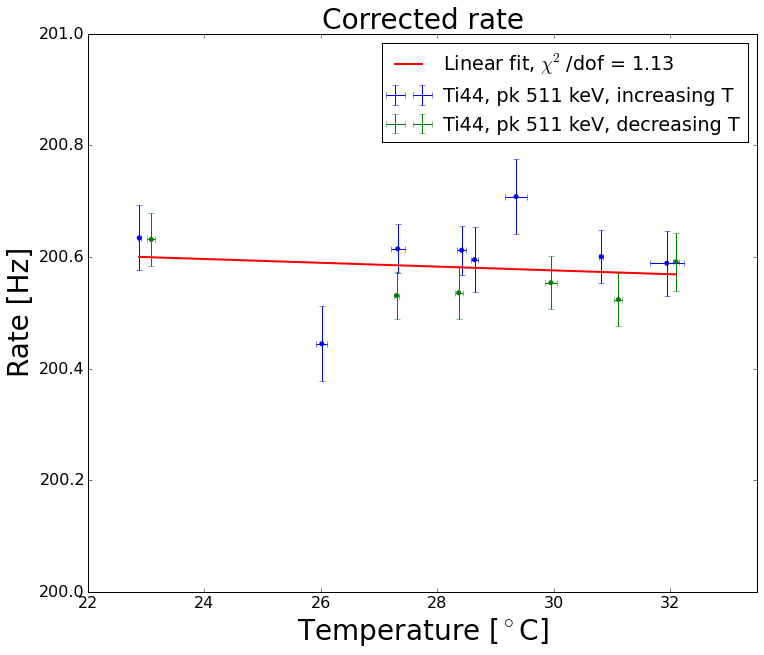

Linear fit Corrected Rate (ax+b) with a = -0.00341172519785 Hz/Degree +- 0.00501727780882, b = 200.678328419 Hz +- 0.143122981466


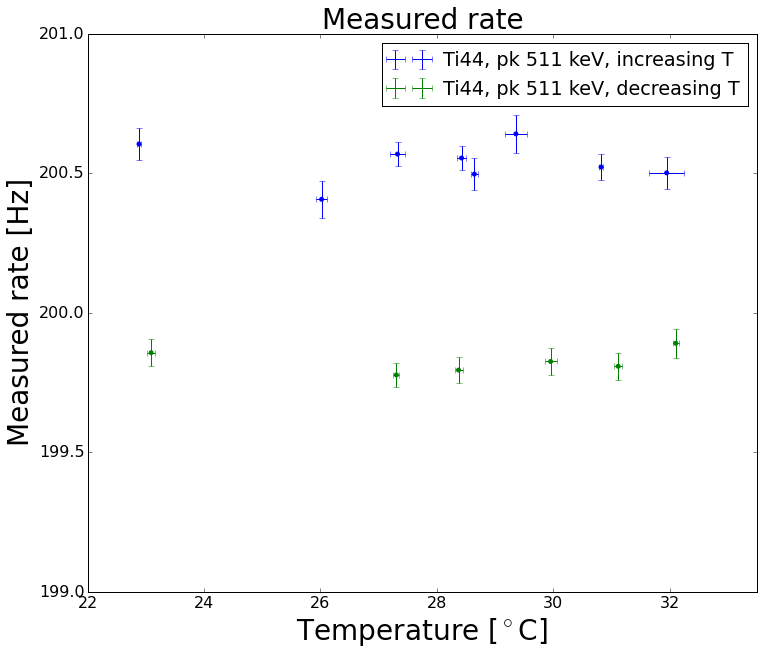

In [11]:
# Temp vs Rate
plt.xlabel('Temperature [$^{\circ}$C]', fontsize = 28)
plt.ylabel('Rate [Hz]', fontsize = 28)
plt.errorbar(mean_temp_steps_array[0:8], mean_corr_rate_steps_array[0:8], xerr=rmse_temp_steps_array[0:8], yerr=error_rate_steps_array[0:8],fmt=None, marker=None, label = 'Ti44, pk 511 keV, increasing T')
plt.scatter(mean_temp_steps_array[0:8], mean_corr_rate_steps_array[0:8], marker='.', edgecolors='none', s=100)
plt.errorbar(mean_temp_steps_array[8:15], mean_corr_rate_steps_array[8:15], xerr=rmse_temp_steps_array[8:15], yerr=error_rate_steps_array[8:15],fmt=None, marker=None, label = 'Ti44, pk 511 keV, decreasing T')
plt.scatter(mean_temp_steps_array[8:15], mean_corr_rate_steps_array[8:15], marker='.', edgecolors='none', s=100, c='g')
plt.plot(temp_fit, lin_func(temp_fit, a_fit_corr_rate, b_fit_corr_rate), 'r-', linewidth=2., label = ('Linear fit, ${\chi}^2$/dof = %s' % round(chi2_corr_combined,2)))
plt.legend()
plt.title('Corrected rate', fontsize = 28)
plt.xlim(22.,33.5)
plt.ylim(200.,201.)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.savefig('tempVScorrRate_Ti_511keV_Tcombined_linFitPNG.png', format='png', dpi=300)
#plt.savefig('tempVScorrRate_Ti_511keV_Tcombined_linFit.pdf', format='pdf', dpi=300)
plt.show()
print('Linear fit Corrected Rate (ax+b) with a = %s Hz/Degree +- %s, b = %s Hz +- %s' % (a_fit_corr_rate, perr_corr_rate[0], b_fit_corr_rate, perr_corr_rate[1]))

# Plot for the measured rate 
#(not needed, just to check and show the effect of correcting for exponential decay)
plt.xlabel('Temperature [$^{\circ}$C]', fontsize = 28)
plt.ylabel('Measured rate [Hz]', fontsize = 28)
plt.errorbar(mean_temp_steps_arrayUP, mean_rate_steps_arrayUP, xerr=rmse_temp_steps_arrayUP, yerr=error_rate_steps_arrayUP, fmt=None, marker=None, label = 'Ti44, pk 511 keV, increasing T')
plt.scatter(mean_temp_steps_arrayUP, mean_rate_steps_arrayUP, marker='.', edgecolors='none', s=100)
plt.errorbar(mean_temp_steps_arrayDOWN, mean_rate_steps_arrayDOWN, xerr=rmse_temp_steps_arrayDOWN, yerr=error_rate_steps_arrayDOWN, fmt=None, marker=None, label = 'Ti44, pk 511 keV, decreasing T')
plt.scatter(mean_temp_steps_arrayDOWN, mean_rate_steps_arrayDOWN, marker='.', edgecolors='none', s=100, c='g')
plt.legend()
plt.title('Measured rate', fontsize = 28)
plt.xlim(22.,33.5)
plt.ylim(199,201.)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.savefig('tempVSmeasuredRate_Ti_511keV_Tcombined_linFitPNG.png', format='png', dpi=300)
#plt.savefig('tempVSmeasuredRate_Ti_511keV_Tcombined_linFit.pdf', format='pdf', dpi=300)
plt.show()

In [30]:
# calculate average rate change per degree 
av = (a_fit_corr_rate)/(b_fit_corr_rate)
max_ = (a_fit_corr_rate-perr_corr_rate[0])/(b_fit_corr_rate-perr_corr_rate[1])
min_ = (a_fit_corr_rate-perr_corr_rate[0])/(b_fit_corr_rate-perr_corr_rate[1])

print('gem: %s' %((av)*8.9*100))
print('max: %s' %(max_))
print('min: %s' %((av-min_)*8.9*100))

gem: -0.0151308586732
max: -4.20325348274e-05
min: 0.0222780973232


In [11]:
# Plot 3 Slow controls (pressure, humidity and temperature)

# # Time vs pres
# plt.xlabel('Time [h]')
# plt.ylabel('Pressure [Pa]')
# plt.errorbar(ti44pk0_time_Tcst, ti44pk0_pres_Tcst, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst')
# plt.scatter(ti44pk0_time_Tcst, ti44pk0_pres_Tcst, marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_Tcst_2, ti44pk0_pres_Tcst_2, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 2')
# plt.scatter(ti44pk0_time_Tcst_2, ti44pk0_pres_Tcst_2, marker='.', edgecolors='none', s=45)
# # plt.errorbar(ti44pk0_time_Tcst_3, ti44pk0_pres_Tcst_3, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 3')
# # plt.scatter(ti44pk0_time_Tcst_3, ti44pk0_pres_Tcst_3, marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_T22_32, ti44pk0_pres_T22_32, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 22-32$^{\circ}$C')
# plt.scatter(ti44pk0_time_T22_32, ti44pk0_pres_T22_32, marker='.', edgecolors='none', s=45)
# plt.axvline(210, color = 'k', linewidth=1.5, label = "Data cut")
# plt.xlim(0,max(ti44pk0_time_Tcst))   
# plt.ylim(97500.,104000)
# plt.legend()
# plt.savefig('timeVSpres_Ti_511keV_TcstANDT22_32.png', format='png', dpi=300)
# plt.show()

# # Time vs humid
# plt.xlabel('Time [h]')
# plt.ylabel('Humidity [%]')
# plt.errorbar(ti44pk0_time_Tcst, np.abs(ti44pk0_humid_Tcst), xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst')
# plt.scatter(ti44pk0_time_Tcst, np.abs(ti44pk0_humid_Tcst), marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_Tcst_2, np.abs(ti44pk0_humid_Tcst_2), xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 2')
# plt.scatter(ti44pk0_time_Tcst_2, np.abs(ti44pk0_humid_Tcst_2), color='g', marker='.', edgecolors='none', s=45)
# # plt.errorbar(ti44pk0_time_Tcst_3, ti44pk0_humid_Tcst_3, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 3')
# # plt.scatter(ti44pk0_time_Tcst_3, ti44pk0_humid_Tcst_3, color='r', marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_T22_32, np.abs(ti44pk0_humid_T22_32), xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 22-32$^{\circ}$C')
# plt.scatter(ti44pk0_time_T22_32, np.abs(ti44pk0_humid_T22_32), color='c', marker='.', edgecolors='none', s=45)
# plt.axvline(210, color = 'k', linewidth=1.5, label = "Data cut")
# plt.xlim(0,max(ti44pk0_time_Tcst))   
# plt.ylim(5.,20.)
# plt.legend()
# plt.savefig('timeVShumid_Ti_511keV_TcstANDT22_32.png', format='png', dpi=300)
# plt.show()    

# Time vs temp
# plt.xlabel('Time [h]')
# plt.ylabel('Temperature [$^{\circ}$C]')
# plt.errorbar(ti44pk0_time_Tcst, ti44pk0_temp_Tcst, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst')
# plt.scatter(ti44pk0_time_Tcst, ti44pk0_temp_Tcst, marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_Tcst_2, ti44pk0_temp_Tcst_2, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 2')
# plt.scatter(ti44pk0_time_Tcst_2, ti44pk0_temp_Tcst_2, color='g', marker='.', edgecolors='none', s=45)
# #plt.errorbar(ti44pk0_time_Tcst_3, ti44pk0_temp_Tcst_3, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 3')
# #plt.scatter(ti44pk0_time_Tcst_3, ti44pk0_temp_Tcst_3, color='r', marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_T22_32, ti44pk0_temp_T22_32, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 22-32$^{\circ}$C')
# plt.scatter(ti44pk0_time_T22_32, ti44pk0_temp_T22_32, color='c', marker='.', edgecolors='none', s=45)
# plt.axvspan(100, 120, alpha=0.5, color='grey', label = 'Data used for linear fit')
# plt.axvspan(135, 150, alpha=0.5, color='grey')
# plt.axvspan(155, 190, alpha=0.5, color='grey')
# plt.axvspan(200, 235, alpha=0.5, color='grey')
# plt.axvspan(245, 260, alpha=0.5, color='grey')
# plt.axvspan(280, 310, alpha=0.5, color='grey')
# plt.axvspan(320, 340, alpha=0.5, color='grey')
# plt.axvspan(360, 380, alpha=0.5, color='grey')
# plt.xlim(0,405) 
# plt.ylim(21,33)
# plt.legend(loc=2, borderaxespad=0.)
# plt.savefig('timeVStemp_Ti_511keV_Tcst12ANDT22_32_shaded.png', format='png', dpi=300)
# plt.savefig('timeVStemp_Ti_511keV_Tcst12ANDT22_32_shaded.pdf', format='pdf', dpi=300)
# plt.show()